# 1. Loading Data and Packages 

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
%matplotlib inline

In [2]:
%time train=pd.read_csv(r'C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\train.csv')

Wall time: 7.25 s


In [3]:
%time train=pd.read_csv(r'C:\Users\praty\Documents\DSIA\work\capstone\datasets\train\train.csv')

Wall time: 7.49 s


In [4]:
%time test=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\test\\test.csv')

Wall time: 2.96 s


In [5]:
%time structures=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\structures.csv')

Wall time: 5.14 s


In [6]:
sccontributions=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\scalar_coupling_contributions.csv')

In [7]:
dipole_moments=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\dipole_moments.csv')

In [8]:
magnetic_shielding_tensors=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\magnetic_shielding_tensors.csv')

In [9]:
mulliken_charges=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\mulliken_charges.csv')

In [10]:
potential_energy=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\train\\potential_energy.csv')

In [11]:
sample_submission=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\work\\capstone\\datasets\\kaggle_submission\\sample_submission.csv')

In [12]:
[train.shape], [test.shape], [structures.shape], [sccontributions.shape] 

([(4658147, 6)], [(2505542, 5)], [(2358657, 6)], [(4658147, 8)])

In [13]:
[dipole_moments.shape], [magnetic_shielding_tensors.shape], [mulliken_charges.shape], [potential_energy.shape]

([(85003, 4)], [(1533537, 11)], [(1533537, 3)], [(85003, 2)])

In [14]:
[sample_submission.shape]

[(2505542, 2)]

In [15]:
train.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [16]:
train.tail(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
4658142,4658142,dsgdb9nsd_133884,17,4,2JHC,3.543450
4658143,4658143,dsgdb9nsd_133884,17,5,3JHC,0.568997
4658144,4658144,dsgdb9nsd_133884,17,6,3JHC,1.173370
4658145,4658145,dsgdb9nsd_133884,17,7,2JHC,4.762010
4658146,4658146,dsgdb9nsd_133884,17,8,1JHC,117.934000


The training has an id for each row, the name of the molecule where the coupling constant originates (the corresponding XYZ file is located at ./structures/.xyz).atom_index_0 and atom_index_1 is the atom indices of the atom-pair creating the coupling. type is the type of the coupling and scalar_coupling_constant is the scalar coupling constant that we want to be able to predict.

In [17]:
test.tail()

,id,molecule_name,atom_index_0,atom_index_1,type
2505537,7163684,dsgdb9nsd_133885,15,3,2JHC
2505538,7163685,dsgdb9nsd_133885,15,4,2JHC
2505539,7163686,dsgdb9nsd_133885,15,6,3JHC
2505540,7163687,dsgdb9nsd_133885,15,7,2JHC
2505541,7163688,dsgdb9nsd_133885,15,8,1JHC


The test set structure is the same as the training except that we don't have the scalar_coupling_constant column. Among the other datasets, the most promising seems to be structures.csv, as it is the only one that is available for both training and testing sets. All the other dataframes are available only for the former.

In [18]:
train.info(),sccontributions.info(),dipole_moments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 6 columns):
id                          int64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
scalar_coupling_constant    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 8 columns):
molecule_name    object
atom_index_0     int64
atom_index_1     int64
type             object
fc               float64
sd               float64
pso              float64
dso              float64
dtypes: float64(4), int64(2), object(2)
memory usage: 284.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85003 entries, 0 to 85002
Data columns (total 4 columns):
molecule_name    85003 non-null object
X                85003 non-null float64
Y                85003 non-null float64
Z                85

(None, None, None)

In [19]:
train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [20]:
test.isnull().sum()

id               0
molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
dtype: int64

In [21]:
structures.isnull().sum()

molecule_name    0
atom_index       0
atom             0
x                0
y                0
z                0
dtype: int64

In [22]:
sccontributions.isnull().sum()

molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
fc               0
sd               0
pso              0
dso              0
dtype: int64

In [23]:
dipole_moments.isnull().sum()

molecule_name    0
X                0
Y                0
Z                0
dtype: int64

In [24]:
magnetic_shielding_tensors.isnull().sum()

molecule_name    0
atom_index       0
XX               0
YX               0
ZX               0
XY               0
YY               0
ZY               0
XZ               0
YZ               0
ZZ               0
dtype: int64

In [25]:
train.nunique()

id                          4658147
molecule_name                 85003
atom_index_0                     29
atom_index_1                     29
type                              8
scalar_coupling_constant    2182935
dtype: int64

In [26]:
test.nunique()

id               2505542
molecule_name      45772
atom_index_0          28
atom_index_1          29
type                   8
dtype: int64

So in our main train and test data files we have information about moleculas and pairs of atoms

1. test set is ~2 times smaller that train set
2. we have 8 unique coupling types for test and train
3. all are type int64 

In [27]:
train.head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570


In [28]:
df=train.drop(['id'], axis=1)


In [29]:
df.head(2)

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570


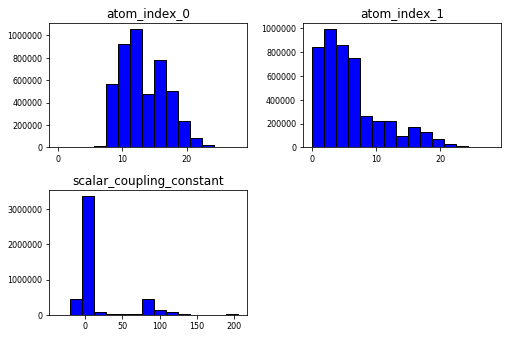

In [30]:

df.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   


 mu = 15.92 and sigma = 34.94



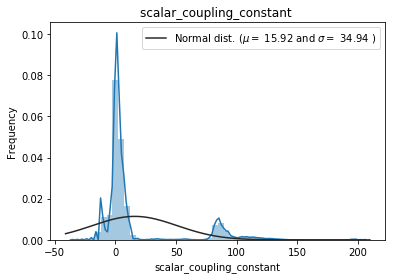

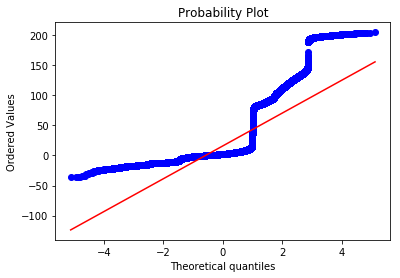

Skewness: 2.024252
Kurtosis: 3.028378


In [31]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
# Plot Histogram
sns.distplot(train['scalar_coupling_constant'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['scalar_coupling_constant'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('scalar_coupling_constant ')

fig = plt.figure()
res = stats.probplot(train['scalar_coupling_constant'], plot=plt)
plt.show()

print("Skewness: %f" % train['scalar_coupling_constant'].skew())
print("Kurtosis: %f" % train['scalar_coupling_constant'].kurt())

In [32]:
df1=test.drop(['id'], axis=1)

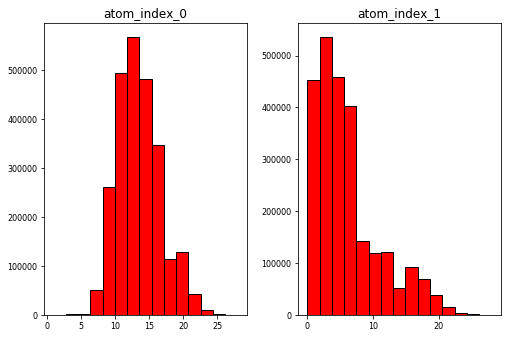

In [33]:
df1.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

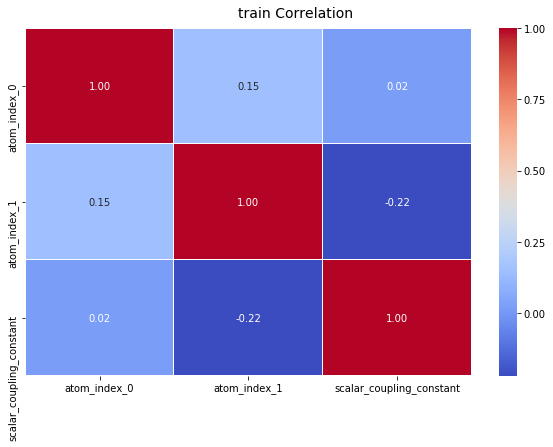

In [34]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('train Correlation', fontsize=14)

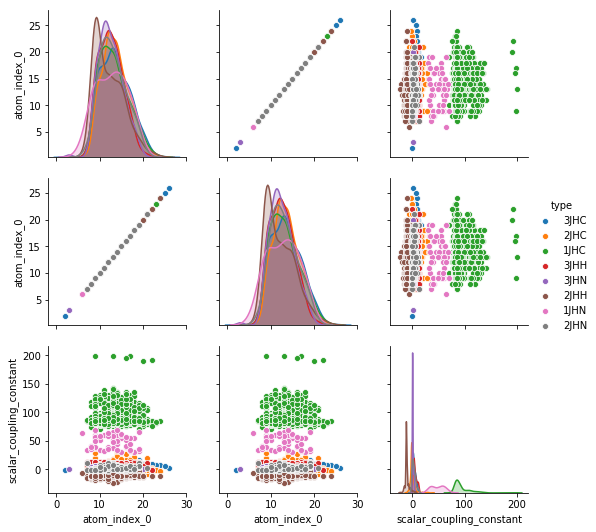

In [35]:
sns.pairplot(data=train.sample(5000), hue='type', vars=['atom_index_0','atom_index_0','scalar_coupling_constant'])
plt.show()

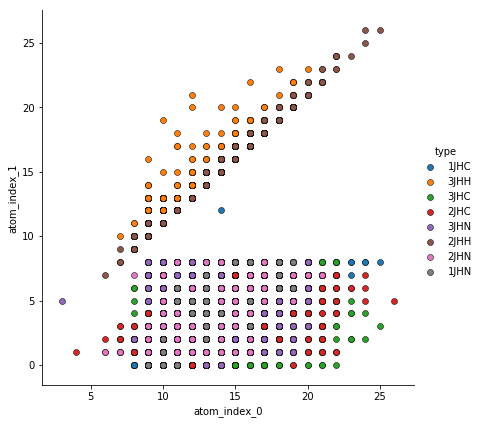

In [36]:
#Mixed attributes (Numeric & Categorical)
jp = sns.pairplot(train.sample(5000), x_vars=["atom_index_0"], y_vars=["atom_index_1"], height=6,
                  hue="type",
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

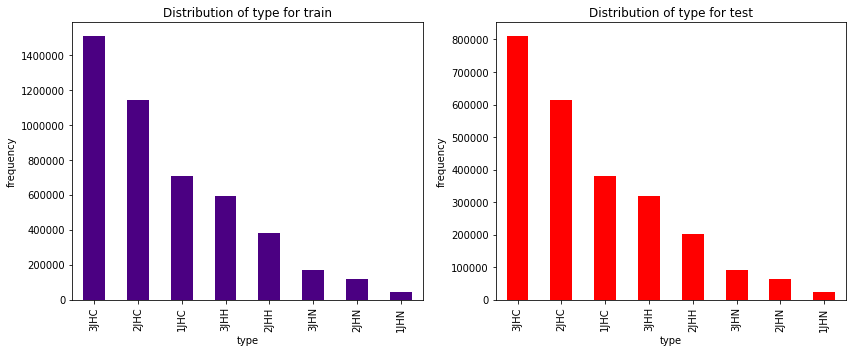

In [88]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of type for train')
plt.ylabel('frequency')
plt.xlabel('type')
train['type'].value_counts().plot.bar(color = 'indigo')

plt.subplot(1, 2, 2)
plt.title('Distribution of type for test')
plt.ylabel('frequency')
plt.xlabel('type')
test['type'].value_counts().plot.bar(color = 'red')
plt.tight_layout()
plt.show()

In [38]:
print('train:')
display(train.type.str[0].value_counts(), train.type.str[-2:].value_counts()) # number of coupling interactions for intervening bonds and atom pairs.
print('test:')
display(test.type.str[0].value_counts(), test.type.str[-2:].value_counts())

train:


3    2267405
2    1637963
1     752779
Name: type, dtype: int64

HC    3360469
HH     968647
HN     329031
Name: type, dtype: int64

test:


3    1220050
2     880688
1     404804
Name: type, dtype: int64

HC    1805746
HH     520561
HN     179235
Name: type, dtype: int64

The datasets have a suprisingly similar distribution of coupling types. This is good, since it means we won't have to worry about oversampling certain types of coupling when we train our model on the training dataset.
But, intuitively it seems that coupling constants with 3 intervening bonds would be the most challenging to predict (due to long-range interactions) and seem to be the most abundant.

H-C interactions also make up a disproportionately large number of coupling compared to the others. ( H-C >> H-H > H-N)

Let's see what the distribution of the number of atoms per molecule looks like:

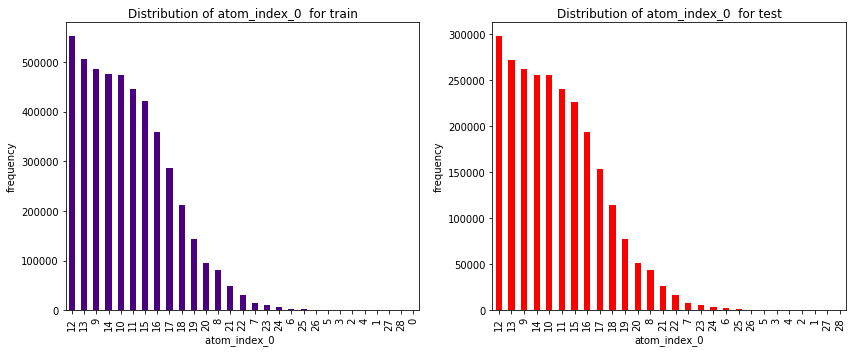

In [89]:
#for distribution of atoms
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of atom_index_0  for train')
plt.ylabel('frequency')
plt.xlabel('atom_index_0  ')
train['atom_index_0'].value_counts().plot.bar(color = 'indigo')

plt.subplot(1, 2, 2)
plt.title('Distribution of atom_index_0  for test')
plt.ylabel('frequency')
plt.xlabel('atom_index_0')
test['atom_index_0'].value_counts().plot.bar(color = 'red')
plt.tight_layout()
plt.show()

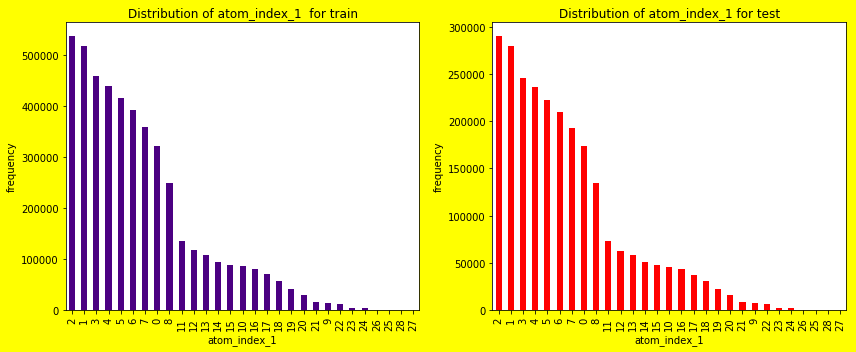

In [40]:
#for distribution of atoms, 
plt.figure(figsize=(12,5), facecolor='yellow')
plt.subplot(1, 2, 1)
plt.title('Distribution of atom_index_1  for train')
plt.ylabel('frequency')
plt.xlabel('atom_index_1')
train['atom_index_1'].value_counts().plot.bar(color='indigo')

plt.subplot(1, 2, 2)
plt.title('Distribution of atom_index_1 for test')
plt.ylabel('frequency')
plt.xlabel('atom_index_1')
test['atom_index_1'].value_counts().plot.bar(color='red')
plt.tight_layout()
plt.show()

In [41]:
type_list = train['type'].unique().tolist()
print('Total {} different coupling types are present in train.csv'.format(len(type_list)))
print(*type_list, sep = ", ")
test_type_list = test['type'].unique().tolist()
print('Total {} different coupling types are present in test.csv'.format(len(test_type_list)))
print(*test_type_list, sep = ", ")

Total 8 different coupling types are present in train.csv
1JHC, 2JHH, 1JHN, 2JHN, 2JHC, 3JHH, 3JHC, 3JHN
Total 8 different coupling types are present in test.csv
2JHC, 1JHC, 3JHH, 3JHC, 2JHH, 1JHN, 3JHN, 2JHN


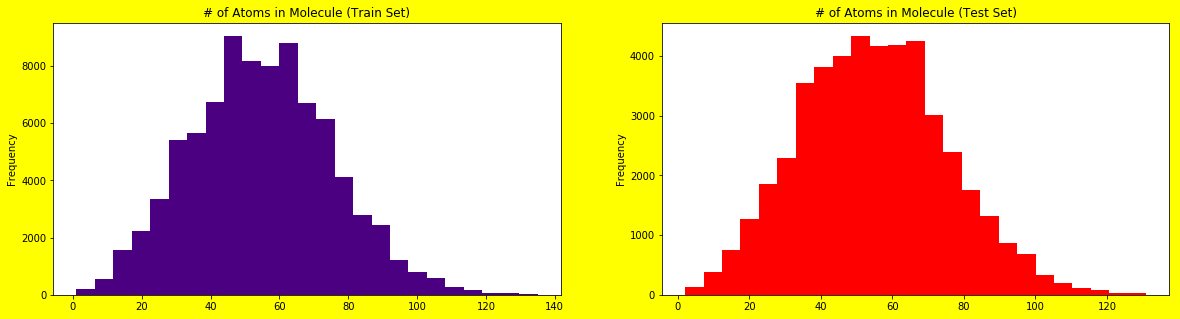

In [42]:
# Number of of atoms in molecule
fig, ax = plt.subplots(1, 2, facecolor='yellow')
train.groupby('molecule_name').count().sort_values('id')['id'].plot(kind='hist',
                                                                       bins=25, 
                                                                        color='indigo',
                                                                        figsize=(20, 5),
                                                                      title='# of Atoms in Molecule (Train Set)',
                                                                      ax=ax[0])
test.groupby('molecule_name').count().sort_values('id')['id'].plot(kind='hist',
                                                                       bins=25, 
                                                                       color='red',
                                                                        figsize=(20, 5),
                                                                      title='# of Atoms in Molecule (Test Set)',
                                                                     ax=ax[1])
plt.show()


In [43]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


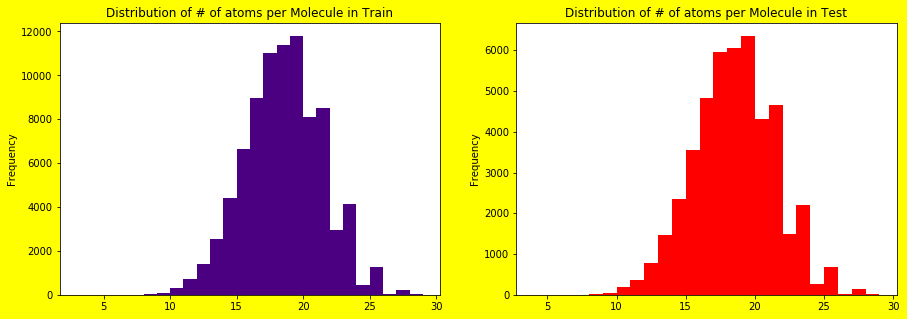

count    85003.000000
mean        18.040975
std          2.934836
min          3.000000
25%         16.000000
50%         18.000000
75%         20.000000
max         29.000000
Name: molecule_name, dtype: float64

In [44]:
data_train = structures[structures.molecule_name.isin(train.molecule_name.unique())].molecule_name.value_counts()
bins_train = data_train.nunique()
data_test = structures[structures.molecule_name.isin(test.molecule_name.unique())].molecule_name.value_counts()
bins_test = data_test.nunique()

f,ax=plt.subplots(1,2,figsize=(15,5), facecolor='yellow')
data_train.plot.hist(ax=ax[0], color = 'indigo', bins=bins_train)
ax[0].set_title('Distribution of # of atoms per Molecule in Train')
data_test.plot.hist(ax=ax[1], color = 'red', bins=bins_test)
ax[1].set_title('Distribution of # of atoms per Molecule in Test')
plt.show()
display(data_train.describe())

Once again, it seems that the train/test split were made to have identical distributions in molecule size and coupling type.

It is likely that the small deviation from a 60/40 split is due to the need to balance the coupling type/molecule size between the train/test datasets. Maybe we can take this into consideration when we create the validation dataset.

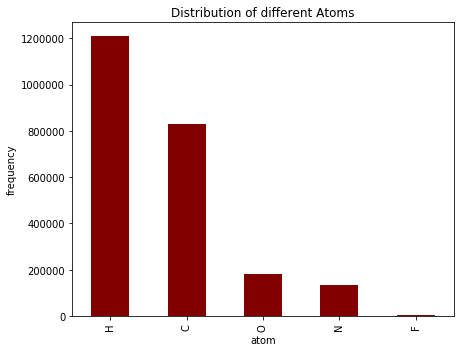

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Distribution of different Atoms')
plt.ylabel('frequency')
plt.xlabel('atom')
structures['atom'].value_counts().plot.bar(color = 'maroon')

plt.tight_layout()
plt.show()

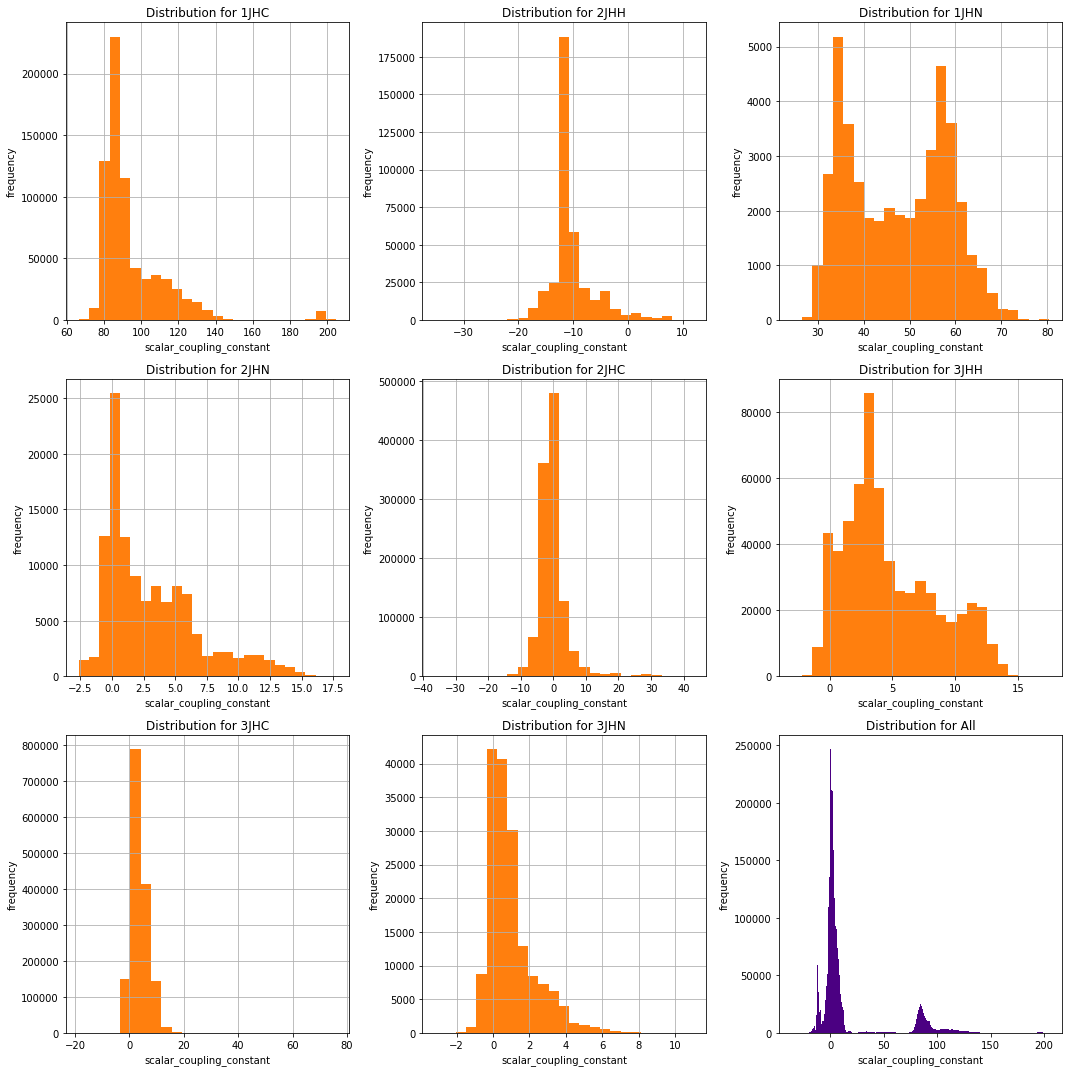

In [46]:
df = train[['type','scalar_coupling_constant']]
plt.figure(figsize=(15,15))

for i,type_ in enumerate(type_list,1):
    plt.subplot(3, 3, i)
    plt.title('Distribution for '+ type_)
    plt.ylabel('frequency')
    plt.xlabel('scalar_coupling_constant')
    plt.hist(df.loc[df['type'] == type_]['scalar_coupling_constant'].values,bins=500)
    df.loc[df['type'] == type_]['scalar_coupling_constant'].hist(bins=25)
plt.subplot(3, 3, 9)
plt.title('Distribution for All')
plt.ylabel('frequency')
plt.xlabel('scalar_coupling_constant')
plt.hist(df['scalar_coupling_constant'].values,bins=500,color='indigo')
plt.tight_layout()
plt.show()

In [90]:
train.sort_values('scalar_coupling_constant', ascending=False).head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_count
251687,251687,dsgdb9nsd_008961,8,7,1JHC,204.880,9
9390,9390,dsgdb9nsd_000485,6,0,1JHC,204.426,7


In [91]:
train.sort_values('scalar_coupling_constant', ascending=True).head(2)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_count
2359478,2359478,dsgdb9nsd_072293,12,3,2JHC,-36.2186,18
644225,644225,dsgdb9nsd_020227,8,1,2JHC,-36.0669,15


1JHC type has the highest vaue of scc, which means that the number of bonds is less, which is 1 here and the atoms are very close. lower values mean longer distance between the atoms

In [49]:
df = train.drop(columns = 'id')

In [50]:
df.columns

Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')

In [51]:
train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant'],
      dtype='object')

C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\U

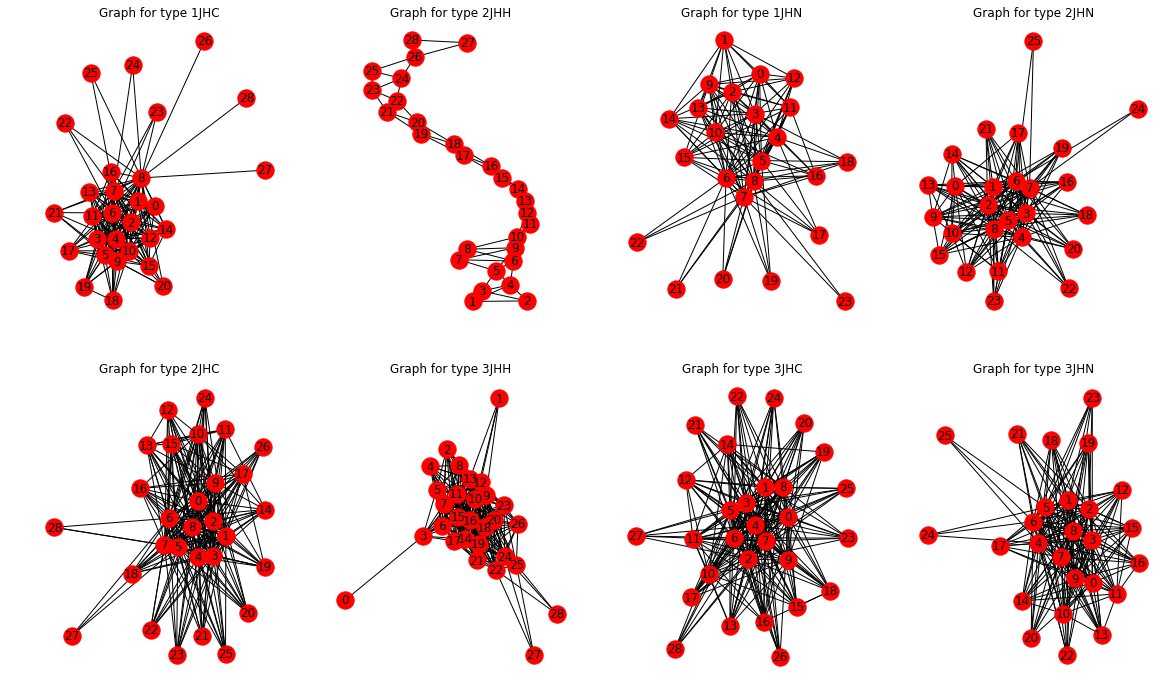

In [52]:
# As the atoms, molecule and scalr coupling constant, we use networkx pyhton package
import networkx as nx
import warnings
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')
    #https://www.kaggle.com/artgor/molecular-properties-eda-and-models

We can see that atom connections have different shapes for different types. Type 2JHH has an expecially unique scheme. 
Also we can see that some atoms are connected only to several other atoms.
Better network graphs
But there is a little problem: as we saw earlier, there are atoms which are very rare, as a result graphs will be skewed due to them. We try to improve by dropping atoms for each type which are present in less than 1% of connections

C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\U

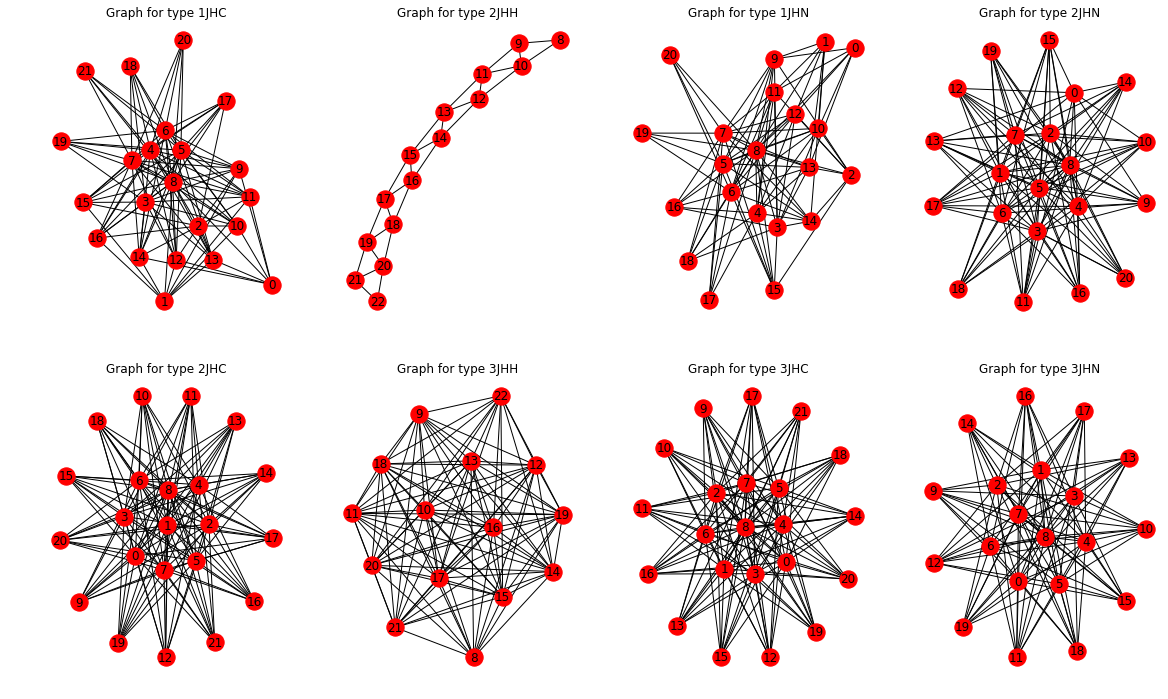

In [53]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    bad_atoms_0 = list(train_type['atom_index_0'].value_counts(normalize=True)[train_type['atom_index_0'].value_counts(normalize=True) < 0.01].index)
    bad_atoms_1 = list(train_type['atom_index_1'].value_counts(normalize=True)[train_type['atom_index_1'].value_counts(normalize=True) < 0.01].index)
    bad_atoms = list(set(bad_atoms_0 + bad_atoms_1))
    train_type = train_type.loc[(train_type['atom_index_0'].isin(bad_atoms_0) == False) & (train_type['atom_index_1'].isin(bad_atoms_1) == False)]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

Now the graphs are much more clear!

# 2b. There are 6 more files available with us (without test files) and they are all related to properties of molecules. Lets check them using profiling

In [54]:
structures.head(7) # has molecule name, atom name corrresponding to atom_index and x,y,z cartesian 
                    #coordinates.this is helpul in plotting the structure of molecules

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377


In [55]:
structures.nunique()

molecule_name     130775
atom_index            29
atom                   5
x                2358441
y                2358364
z                2358421
dtype: int64

In [56]:
sccontributions.head(3) # This again has the common fields like column molecule name , atom_index_0, 
                        #atom_index_1, type along with 4 properties that actually add up to give 
                        #scalar coupling constant

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.27201
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.43360
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.43387


In [57]:
#lets check! for dsgdb9nsd_000001, atom_index_0=1, atom_index_0=0 and type 1JHC
train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548


In [58]:
print(83.0224+0.254579+1.25862+0.27201) # so we find that there is a direct relation between the 
                                        #train and sccontribution

84.807609


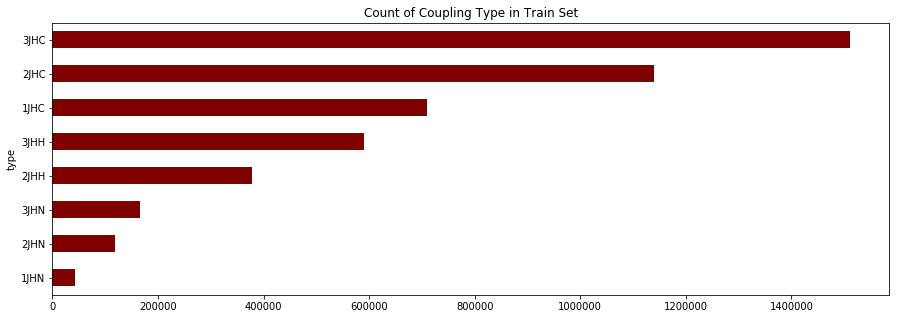

In [59]:
sccontributions.groupby('type').count()['molecule_name'].sort_values().plot(kind='barh',
                                                                color='maroon',
                                                               figsize=(15, 5),
                                                               title='Count of Coupling Type in Train Set')
plt.show()

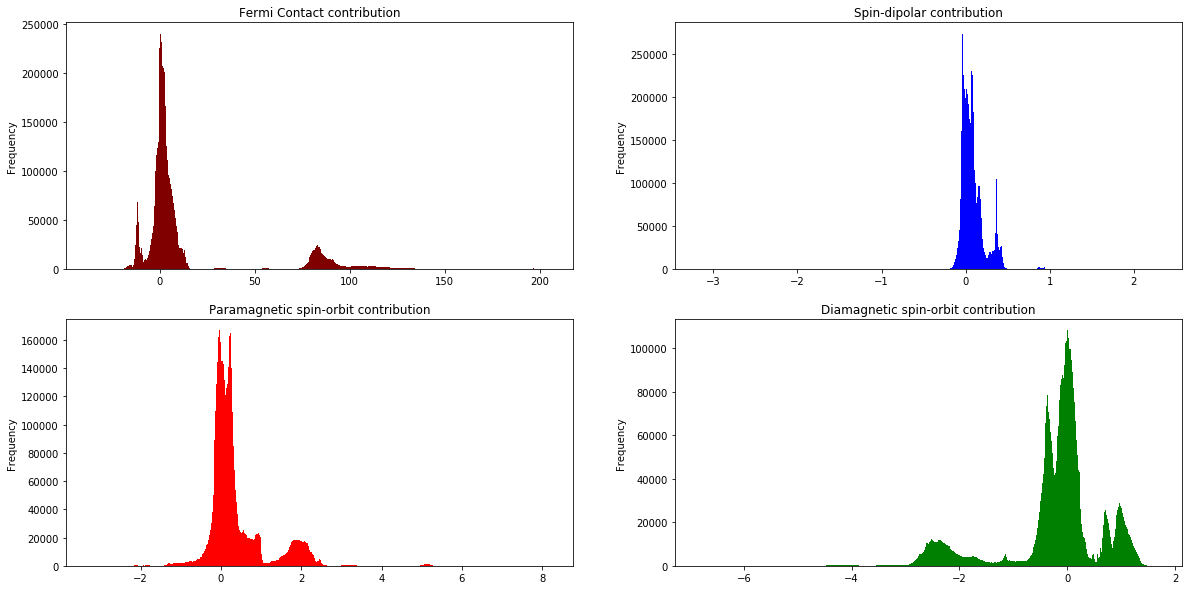

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sccontributions['fc'].plot(kind='hist', ax=ax.flat[0], bins=500, title='Fermi Contact contribution', color='maroon')
sccontributions['sd'].plot(kind='hist', ax=ax.flat[1], bins=500, title='Spin-dipolar contribution', color='blue')
sccontributions['pso'].plot(kind='hist', ax=ax.flat[2], bins=500, title='Paramagnetic spin-orbit contribution', color='red')
sccontributions['dso'].plot(kind='hist', ax=ax.flat[3], bins=500, title='Diamagnetic spin-orbit contribution', color='green')
plt.show()

In [61]:
dipole_moments.head(3)# has the common molecule name corresponds to the 3-D vectors that indicate the 
                        #charge distribution in a molecule.It can have zero values as x,y,z with zero 
                        #values are non polar molecules. 

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511


In [62]:
dipole_moments.shape

(85003, 4)

In [63]:
dipole_moments.nunique() # another interesting thing about dipole momnet is that it has listed all
                        # the unique values of molecule name

molecule_name    85003
X                52494
Y                46825
Z                34847
dtype: int64

In [64]:
magnetic_shielding_tensors.head(3)
# It is a vector, that has the common molecule name, with atom index as can be seen in the 
#structures file with additional details about the elements of the tensor (distance)

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967


In [65]:
mulliken_charges.head(3)# it has the common columns like molecule name and atom index, 
                        #as structures and magnetic shielding files.

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922


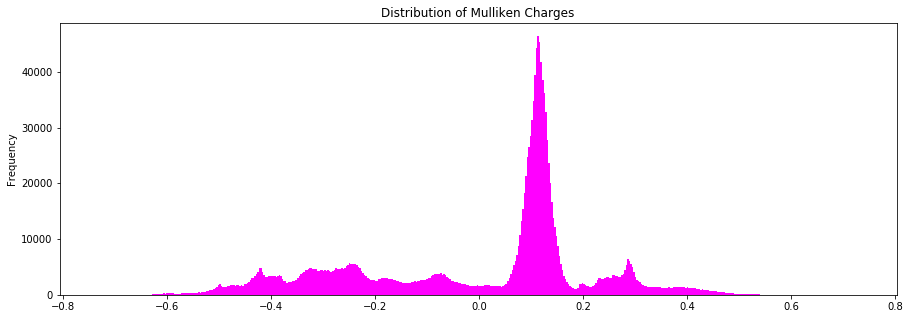

In [66]:
# Plot the distribution of mulliken_charges
mulliken_charges['mulliken_charge'].plot(kind='hist', facecolor='magenta', figsize=(15, 5), bins=500, title='Distribution of Mulliken Charges')
plt.show()

Mulliken charge is really interresting as it provides a quick way of computing atoms local charge with a method based on linear algebra. The most promising method is Electronegativity Equalization Method (EEM) which is describeed in this paper'https://www.kaggle.com/asauve/v7-estimation-of-mulliken-charges-with-open-babel'. Partial atomic charges describe the distribution of electron density in a molecule and therefore provide clues to the chemical behaviour of molecules. Recently, these charges have become popular in chemoinformatics, as they are informative descriptors that can be utilised in pharmacophore design, virtual screening, similarity searches etc. Especially conformationally-dependent charges perform very successfully. In particular, their fast and accurate calculation via the Electronegativity Equalization Method (EEM) seems very promising for chemoinformatics applications.
The charges are calculated with Open Babel, which are available as an autonomous dataset in Open Babel Atom Charges

The Open Babel Package allows to

Read .xyz files (the ones provided in the structures directory)
Build bonding scheme (groovy baby!)
Compute partial charges, with several builtin methods
So we can calculate the mulliken values for train and test datsets using EEM method in babel. Thus this feature can be seen in train as well as head files.

In [67]:
potential_energy.head(3)#energy possesed by the atoms as they are attracted to each other. 
                        #it can be 0, +ve or -ve

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608


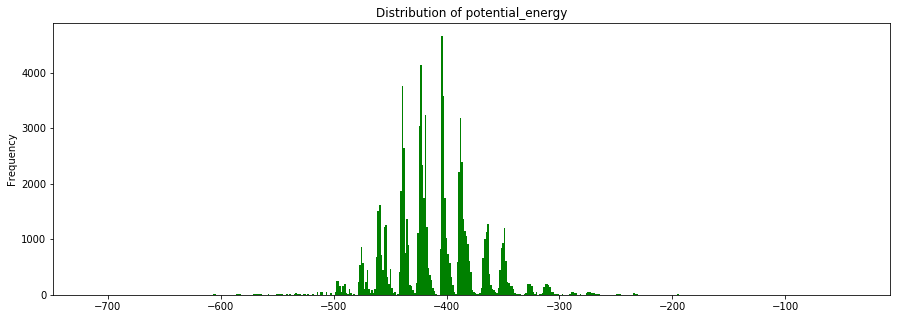

In [68]:
# Plot the distribution of mulliken_charges
potential_energy['potential_energy'].plot(kind='hist', facecolor='green', figsize=(15, 5), bins=500, title='Distribution of potential_energy')
plt.show()

In [69]:
# Atom pair wise info
print('--- Atom pair wise info ---')
print(f'train {train.shape}')
print(f'test {test.shape}')
print(f'scccontributions {sccontributions.shape}')  # only contain train info
print(f'sample_submission {sample_submission.shape}')  # for test prediction

# Molecule wise info
print('--- Molecule wise info ---')
print(f'potential_energy {potential_energy.shape}')  # only contain train info
print(f'dipole_moments {dipole_moments.shape}')  # only contain train info

# Atom wise info
print('--- Atom wise info ---')
print(f'structures {structures.shape}')  # contains both train/test info
print(f'magnetic_shielding_tensors {magnetic_shielding_tensors.shape}')  # only contain train info
print(f'mulliken_charges {mulliken_charges.shape}')  # only contain train info

--- Atom pair wise info ---
train (4658147, 6)
test (2505542, 5)
scccontributions (4658147, 8)
sample_submission (2505542, 2)
--- Molecule wise info ---
potential_energy (85003, 2)
dipole_moments (85003, 4)
--- Atom wise info ---
structures (2358657, 6)
magnetic_shielding_tensors (1533537, 11)
mulliken_charges (1533537, 3)


Relationship between Target and Features
Keep in mind these features are provided for the training data ONLY

In [70]:
sccontributions = sccontributions.merge(train)

In [71]:
sccontributions.head(2)

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,id,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.27201,0,84.8076
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.43360,1,-11.2570


In [72]:
sccontributions.shape

(4658147, 10)

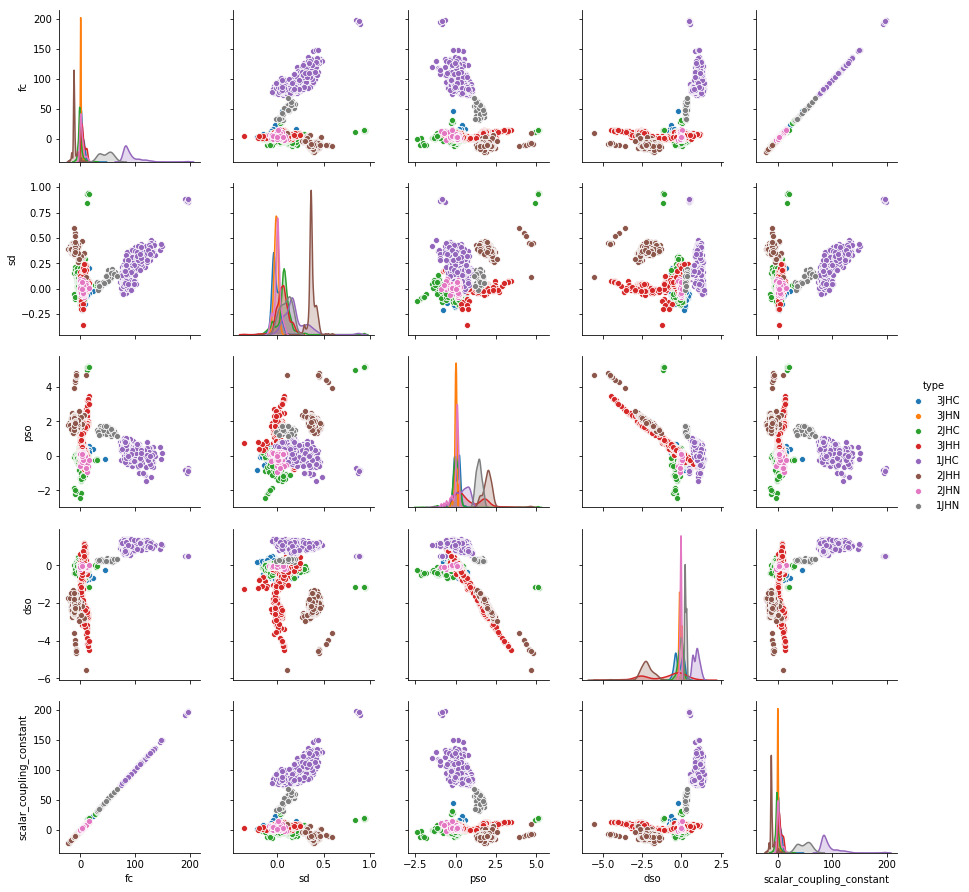

In [73]:
# Downsample to speed up plot time.It shows fc has the best relation with scalar coupling constant
sns.pairplot(data=sccontributions.sample(5000), hue='type', vars=['fc','sd','pso','dso','scalar_coupling_constant'])
plt.show()

# Inference
1. all the information (extra 6 files) provided here can be used to train the model. 
   Note:these files have not been provided with the corresponding test data
2. the zero values are useful and need not be removed
3. mulliken charges can be calculated for train as well as test data using babel lib
4. we can draw the structure of the molecules using the structures file and 'ase' lib
5. we can merge the files and study the importance of these features for our outcome that is scalar coupling constant

In [74]:
atom_count_dict = structures.groupby('molecule_name').count()['atom_index'].to_dict()

In [75]:
train['atom_count'] = train['molecule_name'].map(atom_count_dict)
test['atom_count'] = test['molecule_name'].map(atom_count_dict)

In [76]:
train.head(2), test.head(2)

(   id     molecule_name  atom_index_0  atom_index_1  type  \
 0   0  dsgdb9nsd_000001             1             0  1JHC   
 1   1  dsgdb9nsd_000001             1             2  2JHH   
 
    scalar_coupling_constant  atom_count  
 0                   84.8076           5  
 1                  -11.2570           5  ,
         id     molecule_name  atom_index_0  atom_index_1  type  atom_count
 0  4658147  dsgdb9nsd_000004             2             0  2JHC           4
 1  4658148  dsgdb9nsd_000004             2             1  1JHC           4)

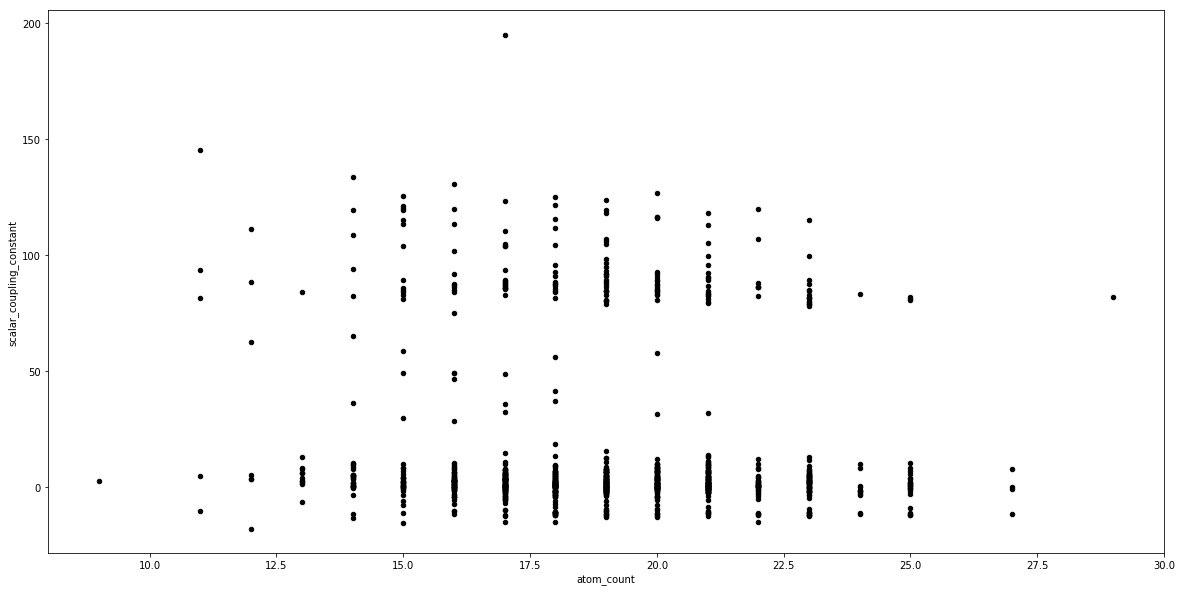

In [77]:
train.sample(1000).plot(x='atom_count',
                           y='scalar_coupling_constant',
                           kind='scatter',
                           color='black',
                           figsize=(20, 10),
                           alpha=1)
plt.show()

When we look at the target scalar_coupling_constant in relation to the atom_count - there visually appears to be a relationship. We notice the gap in coupling constant values, between ~25 and ~75. It is rare to see a value within this range. Could this be a good case for a classification problem between the two clusters?

In [92]:
# lets use structures file to draw the 3d structure 
#https://www.kaggle.com/borisdee/how-to-easy-visualization-of-molecules
import random

# Select a molecule
random_molecule = random.choice(structures['molecule_name'].unique())
molecule = structures[structures['molecule_name'] == random_molecule]
display(molecule)

,molecule_name,atom_index,atom,x,y,z
1671112,dsgdb9nsd_096282,0,C,0.224201,1.598353,0.139189
1671113,dsgdb9nsd_096282,1,C,0.107932,0.070912,0.046721
1671114,dsgdb9nsd_096282,2,C,0.085505,-0.373912,-1.424470
1671115,dsgdb9nsd_096282,3,C,-0.025452,-1.879851,-1.661081
1671116,dsgdb9nsd_096282,4,O,1.117944,-2.589616,-1.200685
1671117,dsgdb9nsd_096282,5,C,1.011379,-3.090146,0.107961
1671118,dsgdb9nsd_096282,6,C,0.953880,-2.039204,1.223493
1671119,dsgdb9nsd_096282,7,O,0.677864,-2.382794,2.349869
1671120,dsgdb9nsd_096282,8,C,1.250785,-0.595729,0.859086
1671121,dsgdb9nsd_096282,9,H,1.176557,1.943975,-0.279773


In [93]:
#Next we need to retrieve the atomic coordinates in a numpy array form:
# Get atomic coordinates
atoms = molecule.iloc[:, 3:].values
print(atoms)

[[ 0.22420072  1.59835266  0.13918866]
 [ 0.10793203  0.07091202  0.04672142]
 [ 0.08550509 -0.37391188 -1.42447041]
 [-0.02545215 -1.8798508  -1.66108125]
 [ 1.11794423 -2.58961571 -1.20068515]
 [ 1.01137903 -3.09014575  0.10796055]
 [ 0.95388017 -2.03920356  1.22349348]
 [ 0.67786418 -2.38279442  2.34986928]
 [ 1.25078471 -0.59572872  0.85908627]
 [ 1.1765566   1.94397544 -0.27977306]
 [-0.58191984  2.0889979  -0.4162203 ]
 [ 0.17313305  1.93790451  1.17817427]
 [-0.84509166 -0.22160106  0.51073814]
 [-0.75625868  0.11377153 -1.93324165]
 [ 0.99900906 -0.01949592 -1.92034248]
 [-0.9371646  -2.28355855 -1.19297555]
 [-0.09622286 -2.07551598 -2.73666184]
 [ 0.13957775 -3.75181583  0.22787717]
 [ 1.9051064  -3.70046548  0.28537242]
 [ 2.1794746  -0.54564949  0.27708847]
 [ 1.39594332 -0.06086883  1.80131464]]


In [94]:
# Get atomic symbols for all the rows above and 2nd column from above
symbols = molecule.iloc[:, 2].values
print(symbols)

['C' 'C' 'C' 'C' 'O' 'C' 'C' 'O' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H'
 'H' 'H' 'H']


In [95]:
#Finally, let's put everything into something that ase can process:


In [96]:
import ase
print(ase.__version__)

3.18.0


In [97]:

from ase import Atoms
import ase.visualize

system = Atoms(positions=atoms, symbols=symbols)

ase.visualize.view(system, viewer="x3d")
#here there are 


In [84]:
molecule = structures[0:5] 
display(molecule)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [85]:
#Next we need to retrieve the atomic coordinates in a numpy array form:
# Get atomic coordinates
atoms = molecule.iloc[0:5, 3:].values
print(atoms)

[[-1.26981359e-02  1.08580416e+00  8.00099580e-03]
 [ 2.15041600e-03 -6.03131760e-03  1.97612040e-03]
 [ 1.01173084e+00  1.46375116e+00  2.76574800e-04]
 [-5.40815069e-01  1.44752661e+00 -8.76643715e-01]
 [-5.23813635e-01  1.43793264e+00  9.06397294e-01]]


In [86]:
# Get atomic symbols for all the rows above and 2nd column from above
symbols = molecule.iloc[:, 2].values
print(symbols)

['C' 'H' 'H' 'H' 'H']


In [87]:
from ase import Atoms
import ase.visualize
system = Atoms(positions=atoms, symbols=symbols)

ase.visualize.view(system, viewer="x3d")